In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_excel("/content/Gestational Diabetic Dat Set.xlsx")

# New section

In [ ]:
df.head()

,Case Number,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM)
0,1,22,2,1,NaN,55.0,0,0,0,0,102.0,69,NaN,12.0,0,0,0
1,2,26,2,1,NaN,53.0,0,0,0,0,101.0,63,NaN,12.4,0,0,0
2,3,29,1,0,NaN,50.0,0,0,0,0,118.0,79,NaN,14.3,0,0,0
3,4,28,2,1,NaN,51.0,0,0,0,0,99.0,70,NaN,15.0,0,0,0
4,5,21,2,1,NaN,52.0,0,0,0,0,116.0,65,NaN,15.0,0,0,0


In [ ]:
df = df.drop(columns=['Case Number'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              3525 non-null   int64  
 1   No of Pregnancy                  3525 non-null   int64  
 2   Gestation in previous Pregnancy  3525 non-null   int64  
 3   BMI                              2444 non-null   float64
 4   HDL                              2524 non-null   float64
 5   Family History                   3525 non-null   int64  
 6   unexplained prenetal loss        3525 non-null   int64  
 7   Large Child or Birth Default     3525 non-null   int64  
 8   PCOS                             3525 non-null   int64  
 9   Sys BP                           1820 non-null   float64
 10  Dia BP                           3525 non-null   int64  
 11  OGTT                             3012 non-null   float64
 12  Hemoglobin          

In [ ]:
df.isnull().sum()

,0
Age,0
No of Pregnancy,0
Gestation in previous Pregnancy,0
BMI,1081
HDL,1001
Family History,0
unexplained prenetal loss,0
Large Child or Birth Default,0
PCOS,0
Sys BP,1705


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed = df_imputed.round(2)
df_imputed

,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM)
0,22.0,2.0,1.0,22.34,55.0,0.0,0.0,0.0,0.0,102.0,69.0,132.0,12.0,0.0,0.0,0.0
1,26.0,2.0,1.0,21.82,53.0,0.0,0.0,0.0,0.0,101.0,63.0,118.0,12.4,0.0,0.0,0.0
2,29.0,1.0,0.0,22.88,50.0,0.0,0.0,0.0,0.0,118.0,79.0,131.6,14.3,0.0,0.0,0.0
3,28.0,2.0,1.0,20.10,51.0,0.0,0.0,0.0,0.0,99.0,70.0,134.8,15.0,0.0,0.0,0.0
4,21.0,2.0,1.0,21.10,52.0,0.0,0.0,0.0,0.0,116.0,65.0,128.8,15.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520,31.0,4.0,1.0,24.10,32.0,0.0,0.0,1.0,0.0,150.0,107.0,187.0,13.4,1.0,1.0,1.0
3521,26.0,3.0,1.0,34.50,43.0,1.0,1.0,0.0,1.0,166.0,85.0,164.0,14.2,0.0,0.0,1.0
3522,35.0,2.0,2.0,23.60,56.0,1.0,0.0,1.0,0.0,178.0,81.0,141.0,15.3,0.0,1.0,1.0
3523,37.0,2.0,0.0,23.30,28.0,1.0,0.0,1.0,1.0,139.0,115.0,133.0,13.3,0.0,1.0,0.0


In [ ]:
df_imputed.isnull().sum()

,0
Age,0
No of Pregnancy,0
Gestation in previous Pregnancy,0
BMI,0
HDL,0
Family History,0
unexplained prenetal loss,0
Large Child or Birth Default,0
PCOS,0
Sys BP,0


In [ ]:
df_imputed.describe()

,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM)
count,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.00000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000
mean,32.581277,2.076312,0.960851,26.853589,45.656000,0.498156,0.364823,0.35773,0.264681,129.137362,81.538156,164.632908,13.959801,0.449645,0.293050,0.389220
std,6.169107,0.838637,0.722313,5.164518,10.536626,0.500068,0.481449,0.47940,0.441226,20.933697,11.379758,47.218441,1.863969,0.497529,0.455226,0.487643
min,20.000000,1.000000,0.000000,13.300000,15.000000,0.000000,0.000000,0.00000,0.000000,90.000000,60.000000,80.000000,8.800000,0.000000,0.000000,0.000000
25%,28.000000,1.000000,0.000000,23.660000,41.000000,0.000000,0.000000,0.00000,0.000000,113.400000,74.000000,136.000000,12.700000,0.000000,0.000000,0.000000
50%,32.000000,2.000000,1.000000,26.200000,47.200000,0.000000,0.000000,0.00000,0.000000,125.600000,81.000000,154.000000,14.000000,0.000000,0.000000,0.000000
75%,37.000000,3.000000,1.000000,29.800000,54.000000,1.000000,1.000000,1.00000,1.000000,142.200000,86.000000,184.000000,15.000000,1.000000,1.000000,1.000000
max,45.000000,4.000000,2.000000,45.000000,70.000000,1.000000,1.000000,1.00000,1.000000,185.000000,124.000000,403.000000,18.000000,1.000000,1.000000,1.000000


In [ ]:
df_imputed = df_imputed[df_imputed['OGTT'] <= 230].reset_index(drop=True)

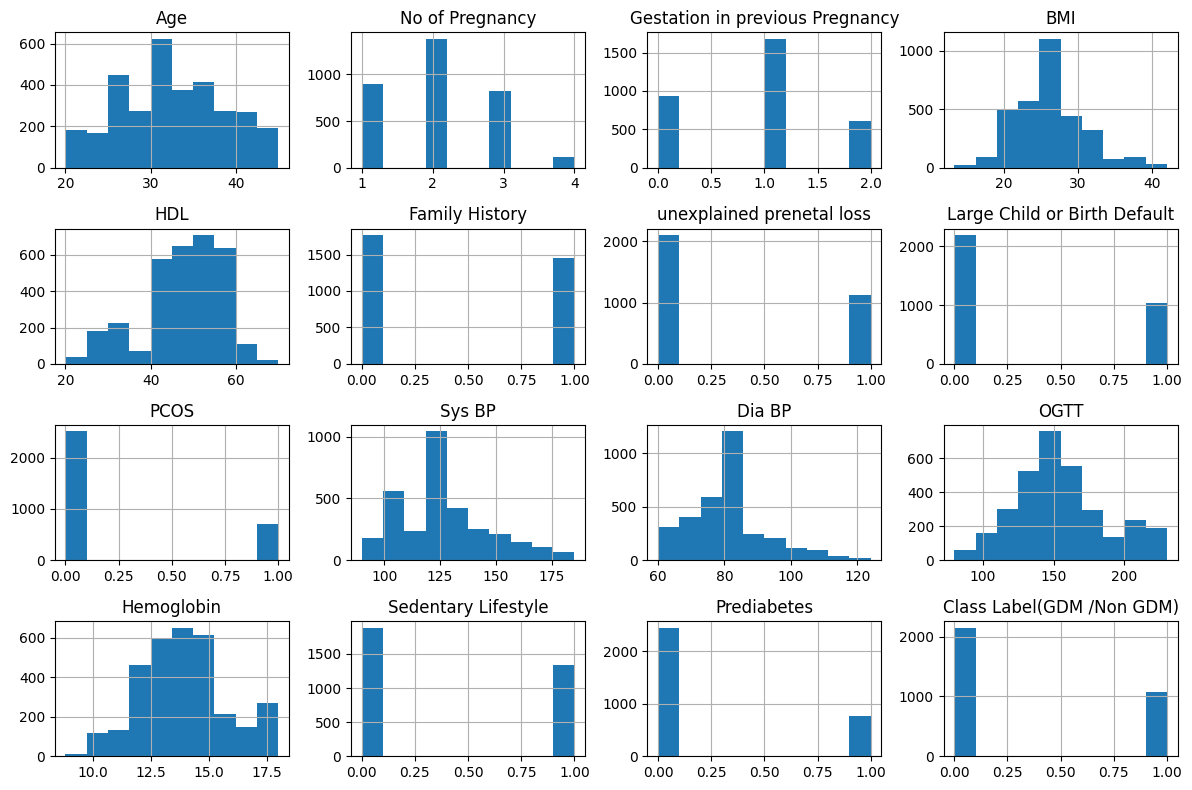

In [ ]:
df_imputed.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

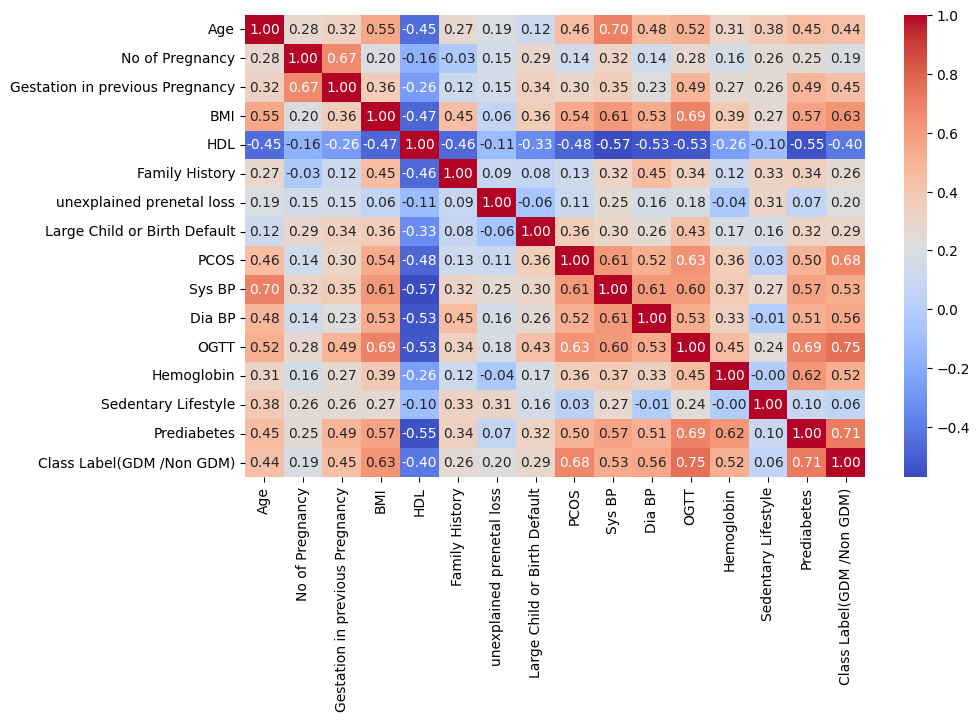

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_imputed.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
X = df_imputed.drop(columns=['Class Label(GDM /Non GDM)'])
y = df_imputed['Class Label(GDM /Non GDM)']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
categorical_features = [
    "Gestation in previous Pregnancy", "Family History", "unexplained prenetal loss", "Large Child or Birth Default",
    "PCOS", "Sedentary Lifestyle", "Prediabetes"
]
X[categorical_features] = X[categorical_features].astype("category")
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.difference(categorical_features)

In [ ]:
numeric_features

Index(['Age', 'BMI', 'Dia BP', 'HDL', 'Hemoglobin', 'No of Pregnancy', 'OGTT',
       'Sys BP'],
      dtype='object')

In [ ]:
scaler = MinMaxScaler()
X_numeric = pd.DataFrame(scaler.fit_transform(X[numeric_features]), columns=numeric_features)
X_categorical = X[categorical_features]
X_scaled = pd.concat([X_numeric, X_categorical], axis=1)

In [ ]:
X_scaled.dtypes

,0
Age,float64
BMI,float64
Dia BP,float64
HDL,float64
Hemoglobin,float64
No of Pregnancy,float64
OGTT,float64
Sys BP,float64
Gestation in previous Pregnancy,category
Family History,category


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print dataset sizes
print("Training Data:", X_train.shape)
print("Testing Data:", X_test.shape)

Training Data: (2576, 15)
Testing Data: (645, 15)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(report)

Accuracy: 0.9689922480620154
Confusion Matrix:
[[439   7]
 [ 13 186]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       446
         1.0       0.96      0.93      0.95       199

    accuracy                           0.97       645
   macro avg       0.97      0.96      0.96       645
weighted avg       0.97      0.97      0.97       645



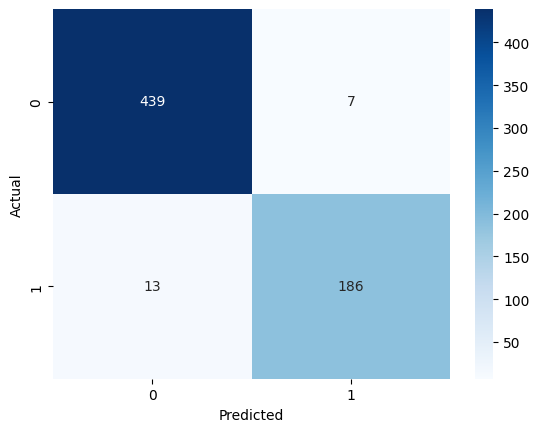

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]         # Whether bootstrap samples are used when building trees
}

In [ ]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters found: ", best_params)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters found:  {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

In [ ]:
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=5,
                       random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred = best_rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest Model: {accuracy*100:.2f}%')

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of Random Forest Model: 96.45%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       448
           1       0.95      0.96      0.95       257

    accuracy                           0.96       705
   macro avg       0.96      0.96      0.96       705
weighted avg       0.96      0.96      0.96       705



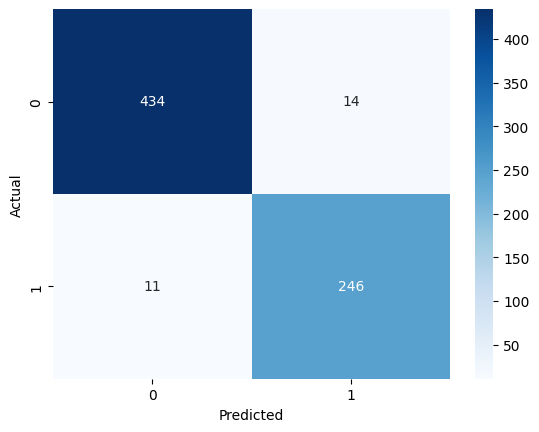

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Accuracy: 97.52%
Classification Report for Neural Network:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       446
         1.0       0.96      0.95      0.96       199

    accuracy                           0.98       645
   macro avg       0.97      0.97      0.97       645
weighted avg       0.98      0.98      0.98       645



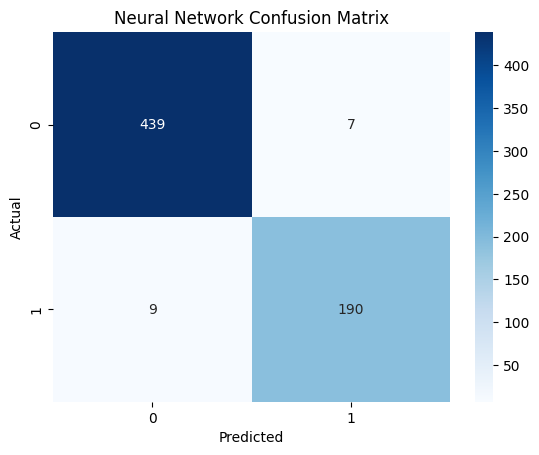

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize the Neural Network model (Multi-layer Perceptron)
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=100, random_state=42)

# Train the model
nn_model.fit(X_train, y_train)

# Make predictions
y_pred_nn = nn_model.predict(X_test)

# Evaluate the model
print(f'Neural Network Accuracy: {accuracy_score(y_test, y_pred_nn)*100:.2f}%')
print("Classification Report for Neural Network:\n", classification_report(y_test, y_pred_nn))

# Confusion Matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Neural Network Confusion Matrix")
plt.show()

In [ ]:
import joblib

In [ ]:
joblib.dump(model, "GDP_model.pkl")

['GDP_model.pkl']